# 4. From Markov Models to Hidden Markov Models
We are now going to extend the basic idea of markov models to hidden markov models. We have talked about latent variables before, and they will be a very important concept as we move forward. They show up in **K-means clustering**, **Gaussian Mixture Models**, **principle components analysis**, and many other areas. With hidden markov models, it even shows up in the name, so you know that hidden (latent) variables are central to this model. 

The basic idea behind a latent variable is that there is something going on beyond what we can observe/measure. What we observe is generally stochastic/random, since if it were deterministic we could predict it without doing any machine learning at all. The assumption that we make when we assume there are latent or hidden variables is that there is some cause behind the scenes that is leading to the observations that we see. In hidden markov models, the hidden cause itself is stochastic-it is a random process, the markov chain. 

An example of this can be seen in genetics. As a human, we are just a physical manifestation of some biological code. Now that the code is readable, it is not hidden in the sense that we can't measure it, but there was a time when we couldn't. At that point, people would use HMM's to determine how genes map to actual physical attributes. 

Another example is speech to text. A computer isn't able to read the words you are attempting to say, but it can use an internal language model-i.e. a model of likely sequences of hidden states, to try and match those to the sounds that it hears. So, in this case what is observed are the sound signal, and the latent variables are just the sentence or phrase that you are saying. 

### 1.1 Markov $\rightarrow$ Hidden Markov
So, how do we go from markov models to hidden markov models? The simplest way to explain this is via an example. Suppose you are at a carnival and a magician has two biased coins that he is hiding behind his back. He will choose to flip one of the coins at random, and all you get to see is the result of the coin toss (H/T). So, what are the **hidden states** and what are the **observed variables**? 

* Since we can see the results of the coin toss, that means heads and tails are our *observed variables*. We can think of this as a vocabulary or space of possible observed values. 
* The **hidden states**, of course, are which coin the magician chose to flip. We can't see them, so they are hidden. This is called a stochastic or random process, since it is a sequence of random variables. 

### 1.2 Define an HMM
How do we actually go about defining an HMM? Well, an HMM has 3 parts:
> **$\pi$, A, B**

(Note that this is opposed to the regular markov model which just has $\pi$ and $A$). $\pi$ is the **initial state distribution**, or the probability of being in a state when the sequence begins. In our coin example, say the magician really likes coin 1, so the probability that he starts with coin 1 is 0.9.

$$\pi_i = 0.9$$

$A$ is the state transition matrix, which tells us the probability of going from one state to another. 

$$A(i,j) = probability \; of \; going \; to \; state \; j \; from \; state \; i$$


In hidden markov models, the states themselves are hidden, so $A$ corresponds from transitioning from one hidden state to another hidden state. In the coin example, suppose the magician is very figity, and the probability of transitioning from coin 1 to coin 2 is 0.9, and the probability of transitioning from 2 to 1 is 0.9. Then, the probability of staying with the same coin for either coin is 0.1.

$$A = \begin{bmatrix}
    A_{11} & A_{12}\\
    A_{21} & A_{22} 
\end{bmatrix}
= \begin{bmatrix}
    0.1 & 0.9\\
    0.9 & 0.1 
\end{bmatrix}
$$

The new variable here of course is $B$. This is the probability of observing some symbol given what state you are in. Note this also a matrix because it has two inputs. What state you are in, which is $j$, and what you observe, which is $k$. 

$$B(j,k) = probability \; of \;observing \;symbol\;k\;while\;you\;are\;in\;state\;j$$

### 1.3 Indepence Assumptions
In the HMM we are making more independence assumptions than just the markov assumption. Remember, the markov assumption is that the current state only depends on the previous state, but is independent of any state before the previous state. Now that we have both observed and hidden variables in our model, we have another independence assumption: 

> "What we observe is only dependent on the current state"

So, the observation at time $t$, depends only on the state at time $t$, but not at any other time, state, or observation. 

### 1.4 What can we do with an HMM? 
So, what are we able to do with an HMM once we have one? Well, it will be similar to what we had discussed with regular markov models, with some additions. With markov models there were two main things we could do:
> 1. **Get the probability of a sequence**. This was just the multiplication of each state transition probability, and the probability of the initial state.  
2. **Train the model.** For this we just used maximum likelihood. That was just using frequency counts. 

With HMM's, we still have these two tasks, but both of these will be harder due to a more complex model. Training will most definitely be harder, because it not only requires the expectation maximization algorithm, but we will run into the limits of the numerical accuracy of the computer (limited accuracy of float). 

There is also one more task we will go over: *finding the most likely sequence of hidden states*. 

## 2. HMM's are Doubly Embedded 
Let's now discuss how HMM's are doubly embedded stochastic processes. Why do we say that they are doubly embedded? Well, think of the inner most layer. This is already a markov model, which is a specific type of stochastic process. With regular markov models, that is all we need-you know the state, end of story. With hidden markov models, once we hit a state there is yet another random sample that must be drawn. Think about our magician example: once the magician chooses the coin (1 or 2) he still has to flip the coin. So, we pick a state and then we have another random variable whose value has to be observed. 

We can think of this as two layers:

> * On the inner most layer, the state is chosen (choosing of coin). 
* On the outer layer, once the state is chosen a random variable is generated using the observation distribution for that state. 

## 3. How can we chose the number of hidden states?
The number of hidden states is a **hyperparameter**. In order to chose the number of hidden states, in general we would use *cross validation*. Well, if you think about, say we have $N$ training samples, and we then create a model with $N$ parameters. We could easily train this model to achieve 100% classication accuracy, however, this does not say anything about how the model will generalize to *unseen data*. Our goal will always be to fit to the trend, and not to the noise. If we can capture the real underlying trend, we should be able to make good predictions on new data. So, we will chose the number of hidden states that gives us the highest validation accuracy. We can use K-folds cross-validation. 

Generally that is all we would need to do when talking about hyperparameters. However, HMM's are a bit different. A lot of the time, the number of states in an HMM can reflect a real physical situation, or what we know about the situation we are trying to model-aka *priori knowledge*. For instance, in the magician example, we know the magician only has two coins, so we would use two states. When we are doing speech to text, we know the number of words in our vocabulary. In addition, we can separately train the hidden state transitions on pure text to give us a good initialization on the transition probabilities. Another example is biology-a codon is sequence of 3 DNA or RNA nucleotides, and these are responsible for creating amino acids which are then turned into proteins. A simple HMM may then have 3 physical states. So, we can use our knowledge of the physical system to help us determine the number of hidden states.  

## 4. The Forward-Backward Algorithm
The first question that we can ask of our HMM is the simplest one: 

>"What is the probability of a sequence?"

Suppose we have $M$ hidden states, and our sequence of observations is of length $T$. The idea is that we want to *marginalize* the joint probability over all possible values of the hidden states. 

So, we start with:

$$p(x,z)$$

Where both $x$ and $z$ are vectors:

$$x = \big[x(1), x(2), ..., x(T)\big]$$

$$z = \big[z(1), z(2), ..., z(T)\big]$$

However, we want to be able to marginalize out $z$ and find:

$$p\big(x(1), x(2),...,x(T)\big)$$

The final equation we end up with is:

$$p\big(x(1), x(2),...,x(T)\big) = \sum_{z(1)=1..M,...,z(T)=1..M}\pi\big(z(1)\big)p\big(x(1)|z(1)\big)\prod_{t=2}^Tp\big(z(t)|z(t-1)\big)p\big(x(t)|z(t)\big)$$

<br>
Which when we break it down we see that we have **the probability of the initial state**: 

$$\pi\big(z(1)\big)p\big(x(1)|z(1)\big)$$

We have **A, the probability of going to state j from state i**:

$$p\big(z(t)|z(t-1)\big)$$

$$A(i,j) = p\big(z(t)=j|z(t-1)=i\big)$$

And we have **B, the probability of seeing symbol k from state j**:

$$p\big(x(t)|z(t)\big)$$

$$B(j,k) = p\big(x(t)=k|z(t)=j\big)$$

By performing our marginalization:

$$\sum_{z(1)=1..M,...,z(T)=1..M}$$

We are essentially saying: 
> For the hidden variable at state 1, we want to look at *each potential value* of z. So in the case of the magician, at state 1, we would perform the calculation if coin 1 was used, z(1) and then add that the calculation if coin two was used, z(2). We would then perform this again from state 2, and all the way up through state $T$. This process of marginalization is based on the product rule of probability. 

Note, that when performing this marginalization we do _not_ need to do it for all values of $x(1)$, $x(2)$, and so on (see the notebook on marginalization). Why is that? Well, in our scenario $x(1)$, $x(2)$ and so on, will have been _observed_. This means that they are known quantities and the realm of probability and uncertainty no longer applies. So, when looking at our equation above:

$$x = \big[x(1), x(2), ..., x(T)\big]$$

We will know the values that $x(1)$, $x(2)$, and so on, took on during that sequence! For example, if $x$ represented heads or tails in a coin flip, we may see:

$$x = \big[x(1)=1, x(2)=0, ..., x(T)=1\big]$$

So, that means we are dealing with the marginalization case where we have a fixed variable(s) (in this case $x$) and are iterating over another variable ($Y$) that we wish to marginalize out:

$$P(X=x) = \sum_{y}p(X=x, Y=y)$$

With that said, the question is, how long will this take to calculate?  Well, in the inner part we have a product which is $2T - 1$, which can be seen based on the first product:

$$\prod_{t=2}^Tp\big(z(t)|z(t-1)\big)p\big(x(t)|z(t)\big)$$

Which is multipled by:

$$\pi\big(z(1)\big)p\big(x(1)|z(1)\big)$$

Given us the second product. This occurs for a total of $T$ times, hence $2T$ products. We then subtract 1 from this based on where $T$ is initialized, leaving us with $2T -1$ products. How many times do we need to compute this product? This is equal to the number of possible state sequences, which is $M^T$. So in total that leaves us with $O(TM^T)$. This is exponential growth which is pretty bad, so we don't want to do this. A better way of doing this would be the forward backward algorithm. The main issue that is causing us so many problems is that we have a product inside of a sum. Normally, we can't simplify a product inside of a sum, but in this case we can factor the expression using the properties of probability to reduce the number of calculations we have to do. 

As a note, if you would like to see an example of the above calculation and the subsequent Forward-Backward algorithm, it can be found in the Appendix - HMM Calculations. 

### 4.1 Forward-Backword Algorithm Process
So, how does the forward backward algorithm actually work? It utilizes _dynamic programming_ in order to reduce the computational complexity of our task. We need to define a variable called $\alpha$:

> _This is the forward variable, and it represents the joint probability of seeing the sequence you have observed up until now and being in a specific state at that time._

$$\alpha(t,i) = p\big(x(1),...,x(t), z(t)=i\big)$$

We can see that there are two index's to $\alpha$: time and $i$, which index's the state.

#### 4.1.1 Step 1
So, our first step is to calculate the initial value of $\alpha$ (t = 1):

$$\alpha(1, i) = p \big(x(1), z(1)=i\big)$$

Where if we recall the _Kolmogorov definition_ of conditional probability:

$$P( A \cap B ) = P(A \mid B) P(B)$$

We can extend that to our scenario:

$$\alpha(1, i) =  p\big(z(1) = i \big) p\big(x(1) \mid z(1)= i\big)$$

And we know that:

$$p\big(x(1) \mid z(1)= i\big) = B\big(i, x(1)\big)$$

And that:

$$p\big(z(1) = i \big) = \pi_i$$

Meaning we end up with:

$$\alpha(t,i) = \pi_iB\big(i, x(t)\big)$$

$$\alpha(1,i) = \pi_iB\big(i, x(1)\big)$$

#### 4.1.2 Step 2
The second step is called the **induction step**. This will be done for every state and every time up until $T$. 

$$\alpha(t+1, j) = \sum_{i=1}^M \alpha(t,i) A(i,j)B(j, x(t+1))$$

What this is doing is allowing us to update our forward variable, $\alpha$. In other words, we continually update the joint probability of seeing the sequence you have observed up until now and being in a specific state at that time.

#### 4.1.3 Step 3
The final step is the termination step, where we marginalize over the hidden states at time $T$. 

$$p(x) = \sum_{i=1}^M\alpha(T,i) = \sum_{i=1}^M p\big(x(1),...,x(T),z(t)=i\big)$$

Notice that we already have our answer. We already know the probability of the sequence after only having done the forward step of the forward-backward algorithm. We can also show that the time complexity of this algorithm is $O(M^2T)$. 

## 4.2 Backward 
Now, at this point we do not need the backward algorithm (it is not needed to solve for $p(x)$, but we are going to use it later! It has two main steps, and it essentially just the reverse of the forward algorithm. 

To perform the backward algorithm, we will define a variable called $\beta$, which is also indexed by time and the state. 

#### Initialization Step
The initialization step is to define $\beta$, at time $T$, to be 1 for every state:

$$\beta(T, i) = 1 $$

$$\beta(t, i) = p\big(x(t+1), ... x(T) \mid z(t)=i\big)$$

#### Induction Step
The induction step is to then calculate the previous $\beta$ for every state, similar to what we did with the forward algorithm: 

$$\beta(t, i) = \sum_{j=1}^M A(i,j)B\big(j, x(t+1)\big) \beta(t+1, j)$$

Again, we want to do this for all times down to 1 or 0, depending on how you index, and for every state at each time. 

### 4.3 Pseudocode

```
alpha = np.zeros((T, self.M))
alpha[0] = self.pi * self.B[:, x[0]]
for t in range(1, T):
    alpha[t] = alpha[t-1].dot(self.A) * self.B[:, x[t]]
P[n] = alpha[-1].sum()

beta = np.zeros((T, self.m))
beta[-1] = 1
for t in range(T-2, -1, -1):
    beta[t] = self.A.dot(self.B[:, x[t+1]] * beta[t+1])
```

We can see above that both $\alpha$ and $\beta$ are arrays of $TxM$, and notice how we have vectorized our operations. 

### 4.4 Forward Algorithm Explanation
The key idea behind the forward algorithm is that we are going to unroll the HMM in time. 

### 4.4.1 Sequence of Length 1
First we can discuss what we do with a sequence of length 1. Remember, the goal is to determine the probability of the sequence. Well, that is just a simple probability problem. 

We have the following:

> * $\pi \rightarrow$ The probability of the first state
* $B \rightarrow$ The probability of observing something given the state

And we want to find:

$$p\big(x(1)\big)$$

So, we just marginalize over the states, $z$:

$$p\big(x(1)\big) = p\big(z(1)=1\big) p\big(x(1) \mid z(1) =1 \big) +...+p\big(z(1)=M\big) p\big(x(1) \mid z(1) =M \big)$$

$$p\big(x(1)\big) = \pi_1 B \big(1, x(1) \big) + \pi_2 B \big(2, x(1) \big)+ ... +\pi_M B \big(M, x(1) \big)$$

Visually, this looks like:

<img src="https://drive.google.com/uc?id=1fobPF0X0ud6boBSGufMhEqSMFlrW_h2W" width="350">

> * We go from the null, or _start_ position, to one of the states. That is $\pi$. For this example, we will assume that the number of states, $M$, is 3.
* We then go from that state to producing an observed variable. That is just:
$\pi$ times $B$ for the 3 states. 

This is our definition for the initial value of $\alpha$:

$$\alpha(1, i) = p \big(x(1), z(1)=i\big)$$

And we can define $\alpha$ at rows 1, 2, and 3 respectively as:

$$\alpha(t=1, i=1) = p \big(x(1), z(1)=1\big) = \pi_1 B \big(1, x(1) \big)$$

$$\alpha(t=1, i=2) = p \big(x(1), z(1)=2\big) = \pi_2 B \big(2, x(1) \big)$$

$$\alpha(t=1, i=3) = p \big(x(1), z(1)=3\big) = \pi_3 B \big(3, x(1) \big)$$

### 4.4.2 Sequence of Length 2 $\rightarrow$ Induction Step
Now let's think about what we can do for a sequence of length 2. How would we find $p\big( x(1), x(2)\big)$, given we already have $p\big(x(1)\big)$? Remember, the observations are not directly dependent, and that each observation at a certain time, depends only on the state at that time. The states are Markov, so we can use the Markov assumption here. Let's try and find the probability of the second observation, $x(2)$, if the state is 1.

The question we want to ask here is: 

> How can we get to state 1 at time t=2, seeing symbol $x(2)$? 

The answer is that we can come from any possible previous state! Visually, that looks like:

<img src="https://drive.google.com/uc?id=1xa5_zvkhWwDP48J5mBymgB1m_50tsI6R" width="350">

Since each of those transitions are independent, we can sum each of those distinct possibilities:

$$\pi_1A(1,1)B(1, x(2))+ \pi_2A(2,1)B(1, x(2))+\pi_3A(3,1)B(1, x(2))$$

Where: 

> * $\pi_1$ is the probability we start at state 1
* $A(1,1)$ is the probabilty of transitioning from state 1 to state 1 
* $B(1, x(2))$ is the probability of observing $x(2)$ while in state 1
* We then add the probability that we came from state 2 and state 3

Notice, if we include the $B$ for $t=1$, $B(i, x(1))$, this just gives us $\alpha$:

$$\pi_1B \big(1, x(1) \big)A(1,1)B(1, x(2))+ \pi_2B \big(2, x(1) \big)A(2,1)B(1, x(2))+\pi_3B \big(3, x(1) \big)A(3,1)B(1, x(2))$$

Hence, we can write the previous probability in terms of the previous $\alpha$:

$$\alpha(t=0, i=1)A(1,1)B(1, x(2))+ \alpha(t=0, i=2)A(2,1)B(1, x(2))+\alpha(t=0, i=3)A(3,1)B(1, x(2))$$

But wait-this is just the next $\alpha$ at time $t=2$!

$$\alpha(t=2, i=1)$$

That particular $\alpha$, at time $t=2$ and state = 1, is the probability of observing $x(1)$ and observing $x(2)$ and being in the state 1 at time = 2:

$$\alpha(t=2, i=1) = p \big(x(1), x(2), z(2)=1 \big)$$

So, we can see that $\alpha$ is defined recursively! This particular $\alpha$ we are showing for $t=2$ and state = 1, is the probability of observing $x(1)$ and $x(2)$, and being the state $z(2) = 1$ at $t=2$. 

Realize that this induction can be used for any subsequent time step. In other words, the next $\alpha$ can always be defined in terms of the current alpha. The probability that this gives us is the probability of the observed sequence so far, and ending up in a particular state:

$$\alpha(t+1,i=1) = p \big(x(1),...,x(t+1), z(t+1)=1\big)$$

### 4.4.3 Termination Step
If we keep doing this process, eventually we will end up with $\alpha(T,i)$, which is the probability of the entire sequence, and ending up in state $i$:

$$\alpha(T,i) = p \big(x(1),...,x(T), z(T)=i\big)$$

Remember, our goal is to find just the probability of the sequence, so how can we do that? We can do the same thing that we did initially, it is just another probability problem. We marginalize over $z$, or in other words, sum the last $\alpha$ over all $i$:

$$p \big(x(1),...,x(T)\big) = \sum_{i=1..M}\alpha(T,i)$$

## 5. Viterbi Algorithm
One question that we may have for our HMM, especially if our hidden states are modeled on some physical reality or an actual system, rather than just being arbitrary latent variables, is:

> What is the sequence of hidden states, given the observation?

For example, given a sound sample of someone speaking, what are the words that they are saying? This is what the **Viterbi Algorithm** calculates-the most probable hidden state sequence, given the observed sequence, under the current model. 

We will see that the viterbi algorithm works a lot like the forward algorithm we just went ever, expect that instead of just taking the sum, we just take the max. 

One extra thing we will need to add is _**backtracking**_, since we will need to keep track of the actual states, not just determine the final probability. 

### 5.1 Viterbi Algorithm Internals
To do this we will create two new variables:

> * $\delta(t,i)$, which is indexed by time and state. This will represent the maximum probability of ending up in state $i$ at time $t$, which is a joint probability distribution over the state sequence and observed sequence. <br>
<br>
$$\delta(t,i) = max \Big \{p\big(z(1),...,z(t)=i, x(1),...,x(t) \big) \Big \}$$
<br>
* $\psi(t,i)$, which is also indexed by time and state. This will keep track of the actual state sequences that end up at time $t$ and in state $i$. <br>
<br>
$$\psi(t,i)$$

### 5.1.1 Step 1 - Initialization
We again will have 3 steps, the first of which is initialization. It looks very much like the forward algorithm:

$$\delta(t,i) = \pi_i B\big(i, x(1)\big)$$
$$\psi(1,i) = 0$$

### 5.1.2 Step 2 - Recursion
We then have the recursion step, which we will calculate for all times and all states, filling up the values in $\delta$ and $\psi$:

$$\delta(t, j) = max_{1 \leq i \leq M} \big \{ \delta(t-1, i) A(i,j)\big \} B\big(j, x(t) \big)$$

$$\psi(t,j) = argmax_{1 \leq i \leq M} \big \{ \delta(t-1, i) A(i,j)\big \}$$

### 5.1.3 Step 3 - Termination Step
Finally, we have the termination step, where we find the maximum probability:

$$p^* = max_{1 \leq i \leq M} \delta(T,i)$$

For the best state sequence, in the final best state:

$$z(T)^* = argmax_{1 \leq i \leq M} \delta(T, i)$$

To determine the rest of the best state sequence, we just need to back track using $\psi$. This is done for time equals $T-1$ all the way down to 1:

$$z(T)^* = \psi (t+1, z(t+1)^*)$$

### 5.1.4 Pseudocode
In pseudocode, it may look like:

```
delta = np.zeros((T, self.M))
psi = np.zeros((T, self.M))
delta[0] = self.pi*self.B[:, x[0]]
for t in range(1, T):
    for j in range(self.M):
        delta[t,j] = np.max(delta[t-1] * self.A[:,j]) * self.B[j, x[t]]
        psi[t,j] = np.argmax(delta[t-1] * self.A[:, j])
        
# Back Track
states = np.zeros(T, dtype=np.int32)
states[T-1] = np.argmax(delta[T-1])
for t in range(T-2, -1, -1):
    states[t] = psi[t+1, states[t+1]]
return states
```

## 6. Viterbi Visualization
The main difference between the viterbi algorithm and the forward algorithm, is that instead of taking the sum over all of the previous states that could have lead to the current one, we want to take the _max_. This is because we want to find the sequence that gives us the highest _observation probability_. 

### 6.1 First Step Visualization 
The first step is to consider just one observation, $x(1)$.

<img src="https://drive.google.com/uc?id=1fobPF0X0ud6boBSGufMhEqSMFlrW_h2W" width="350">

Since just one observation corresponds to just one state, then we just want to find the most probable single state. This is just the maximum of $\pi$ times $B$:

$$max\Big(\pi_1B\big(1, x(1)\big), \pi_2B\big(2, x(1)\big), \pi_3B\big(3, x(1)\big) \Big)$$

This is just the probability of going to a state, and then observing what we observed from that state. Remember, we defined $\pi B$ as $\delta$, which is indexed by time and state; this allows us to make the following substitution:

$$max \Big(\delta(t=1, 1), \delta(t=1, 2), \delta(t=1, 3)\Big)$$

### 6.2 Two Step Sequence $\rightarrow$ Induction Step
Let's now look at a two step sequence to get a better intuition for how our induction step works. We have the following visualization:

<img src="https://drive.google.com/uc?id=1BFQUEiASvSw_B88xaddwrmj1RCd9guul" width="350">

We will consider the following: a two step sequence, which we observe $x(1)$ and $x(2)$. Note, in our visualization $x(1)$ is not shown to allow things to stay more compact. Instead, $\delta$ is utilized in the place of the $\pi \rightarrow x$ observations from the previous diagram. We can ask: how can we get to state 1 (the state at the top, $z_2 = 1$) at time $t=2$ from $t=1$?

The answer is that we can get there from any other state! This can be seen clearly below:

<img src="https://drive.google.com/uc?id=1xHg9PBHYoGIeqUJfdosfFdcCk_3HzcRQ" width="350">

So the main idea is that we want to pick the one that gives us the maximum probability so far. How can we get that probability? That is the previous $\delta$, which if we recall is $\pi B$ at time $t=1$:

$$\delta(1,i)$$

And then transitioning from that state to the current state (which we are currently assuming is 1):

$$A(i,1)$$

And then multiplying by the observation probability from this state:

$$B\big( 1, x(2)\big)$$

The _best_ path is whatever gives us:

$$max \Big(\delta(1,i)A(i,1)B\big( 1, x(2)\big) \Big)$$

$$max \Big( 
\overbrace{ \delta(1,1)A(1,1)B\big( 1, x(2)\big)}^\text{Transitioning from 1 to 1}, 
\overbrace{ \delta(1,2)A(2,1)B\big( 1, x(2)\big)}^\text{Transitioning from 2 to 1}, 
\overbrace{ \delta(1,3)A(3,1)B\big( 1, x(2)\big)}^\text{Transitioning from 3 to 1}, 
\Big)$$

That max is clearly dependent on the previous state, $i$, so we are taking the max with respect to $i$. Note, the above equation is just the definition of the next $\delta$!

$$\delta(2,1) = max \Big(\delta(1,i)A(i,1)B\big( 1, x(2)\big) \Big)$$

Hence, $\delta$ is also defined recursively in terms of its previous value. Keep in mind that we just found $\delta(2,1)$, but there are two more entries that we must find still: $\delta(2,2)$ and $\delta(2,3)$. This represent the max of going from all states to state 2, and from all states to state 3, respectively (shown below). 

<img src="https://drive.google.com/uc?id=1Ji1z8_MlWz46zEqJJuT4_lUYJdcHwgEo" width="650">

In the end, what we are looking for is the best state sequence, considering all the observed variables as a whole. So that means that looking at only the first observation, perhaps being in state 1 gives us the best total probability. But, if we are considering both observations, being in state 2 and then transitioning to state 1 might give us the best total probability for the entire sequence. In that case, we should say that the state at time $t=1$ is 2, $z_1 = 2$.  

Because we can only determine the best sequence at the very last $\delta(T,i)$, we need to keep track of all possible state transitions that we encounter. Thus, we want to keep track of _ALL_ possible state transitions that we encountered. That is not exponential, because it doesn't consider all possible state transitions in total, just the ones that were giving us the best probabilities along the way. 

<img src="https://drive.google.com/uc?id=1ALIbniOfAGr9d9JwmDFJvDwUaAnF1bYj" width="350">

### 6.3 Termination Step
Since $\delta(T,i)$ is the best probability for observing the whole sequence $x(1), ..., x(T)$ and ending up in state $i$, then the max of that will give us the best probability overall:

$$max_i \big \{ \delta(T, i)\big \} $$

Furthermore, the argmax will give us the best last state! 

$$z(T)^* = argmax_i \big \{ \delta(T,i)\big \}$$

And since we were keeping track of all of the transitions, we know we got to the last state, $z(T)^*$, from the second last state, $z(T-1)^*$, and we know the third last state and so on. 

## 7. Baum-Welch Algorithm
We are now going to discuss the last of the three tasks that we can perform on an HMM, and it is the most critical:

> How do we train an HMM?

Similar to when we studied Gaussian Mixture Models, we have a latent variable where all of the possibilities need to be summed over, so we can't easily find the maximum likelihood solution. We need to use the expectation maximization algorithm, which is an iterative algorithm. 

The _**Baum-Welch**_ algorithm is named after the mathematicians who invented it, and it relies on the forward-backward algorithm that we learned about earlier. In fact, the first step to completing the Baum-Welch update, is to first compute the forward and backward variables, $\alpha$ and $\beta$. 

### 7.1 New Variable $\rightarrow \phi$
Once we have those variables, we can compute a new quantity called $\phi$. It has three indices, $t,i,j$:

$$\phi(t, i ,j) = p\big(z(t)=i, z(t+1)=j \mid x\big)$$

> Which simply represents the  _probability of being in the state $i$ at time $t$, transitioning to state $j$ at time $t + 1$, given the observation sequence_. This can be seen visually below:

<img src="https://drive.google.com/uc?id=1wlFzujos5h8KHtZit2QldjY2iOl2NtWN" width="350">

The full definition of $\phi$ is as follows:

$$\phi(t, i ,j) = \frac{\alpha(t,i)A(i,j)B\big(j, x(t+1)\big)\beta(t+1, j)}{\sum_{i=1}^M \sum_{j=1}^M \alpha(t,i)A(i,j)B\big(j, x(t+1)\big)\beta(t+1, j)}$$

Now, at this point we have introduce yet another new variable, and our equation is dependent upon several others, in additions to states, symbols, and time steps. To help clarify all of this, the following summary has been created:

#### Forward Variable: $\alpha$
> * **Description**: It represents the joint probability of seeing the sequence you have observed up until now and being in a specific state at that time.
* **Probability Representation**: $$\alpha(t,i) = p\big(x(1),...,x(t), z(t)=i\big)$$
* **Equation**

#### Backward Variable: $\beta$
> * **Description**: Given you are currently in state $i$, what is the the probability that the rest of the sequence you had observed plays out?
* **Probability Representation**: $$\beta(t, i) = p\big(x(t+1), ... x(T) \mid z(t)=i\big)$$

#### Transition Matrix: $A$
> * **Description**: The probability of going from state $i$ to state $j$
* **Probability Representation**: $$A(i,j) = p\big(z(t)=j|z(t-1)=i\big)$$

#### Observation/Emission Matrix: $B$
> * **Description**: The probability of seeing symbol $k$ from state $j$
* **Probability Representation**: $$B(j,k) = p\big(x(t)=k|z(t)=j\big)$$

#### New Variable: $\phi$
> * **Description**: Probability of being in the state $i$ at time $t$, transitioning to state $j$ at time $t + 1$, given the observation sequence
* **Probability Representation**: $$\phi(t, i ,j) = p\big(z(t)=i, z(t+1)=j \mid x\big)$$
* **Equation**: $$\phi(t, i ,j) = \frac{\alpha(t,i)A(i,j)B\big(j, x(t+1)\big)\beta(t+1, j)}{\sum_{i=1}^M \sum_{j=1}^M \alpha(t,i)A(i,j)B\big(j, x(t+1)\big)\beta(t+1, j)}$$<br>
<br>
* **Intuition**: If we look at the above equation for $\phi$ we can see that the numerator and denominator are the same, except for the summations over $i$ and $j$ in the denominator. And if we dissect the numerator, we see the following: <br>
<br>
$$\scriptsize
\begin{pmatrix}
    \text{Probability of seeing the} \\
    \text{sequence you have observed} \\
    \text{up until now and being in a }\\
    \text{specific state at that time.}
  \end{pmatrix} *
\begin{pmatrix}
    \text{The probability of} \\
    \text{going from state $i$} \\
    \text{to state $j$} 
  \end{pmatrix} *
\begin{pmatrix}
    \text{The probability of} \\
    \text{seeing symbol $k$ } \\
    \text{from state $j$}
  \end{pmatrix} *
\begin{pmatrix}
    \text{The probability that the } \\
    \text{rest of the sequence observed } \\
    \text{plays out, given you are }\\
    \text{currently in state $i$.}
  \end{pmatrix}
$$<br>
This is then divided by the exact same probability, but normalized so that all possible $i$'s transitioning to all possible $j$'s are accounted for. 


### 7.2 Another New Variable $\rightarrow \gamma$
Once we have $\phi$ we can define another variable, $\gamma$, which depends only on $t$ and $i$, and sum over $j$ which is all of the states:

$$\gamma(t,i) = \sum_{j=1}^M \phi(t,i,j)$$

So, $\gamma$ is just the $\phi$ probability, marginalized over $j$. In other words:

$$\gamma(t,i) = p \big(z(t) = i \mid x\big)$$

### 7.3 Sum over time
The key here is that when we sum these variables over all time, $\gamma$ represents the expected number of transitions from state $i$:

$$\sum_{t=1}^{T-1}\gamma(t,i) = E\big( \text{number of transitions from state i}\big)$$

And $\phi$ represents the expected number of transitions from state $i$ to state $j$:

$$\sum_{t=1}^{T-1}\phi(t,i,j) = E\big( \text{number of transitions from state i to state j}\big)$$

### 7.4 Update Equations
So, we can define our update equations as follows; $\pi$ is just:

$$\pi = \gamma(1, i)$$

$A(i,j)$ is just the expected number of transitions from $i$ to $j$, divided by the number of transitions from $i$:

$$A(i,j) = \frac{\sum_{t=1}^{T-1} \phi(t,i,j)}{\sum_{t=1}^{T-1}\gamma(t,i)}$$

And $B(i,k)$ is just all the $\gamma$'s if $x(t) = k$, divided by all the $\gamma$'s:

$$B(i,k) = \frac{\sum_{t=1}^{T-1} \gamma(t,i) \; if \; x(t)=k, \; else \; 0}{\sum_{t=1}^{T-1}\gamma(t,i)}$$

Keep in mind we are only considering one sequence at this point. Of course, we want to fit our model to all training sequences. We will discuss how to do that in the next section.

---

## 8. Baum-Welch Explanation and Intuition 
Let's now take a minute to dig into the mechanics of the Baum-Welch Algorithm. It can come across as rather confusing at first, but we can break it down into multiple steps so that it is easier to process. 

First and foremost, we need to keep in mind the following: so far we have been using predefined $A$, $B$, and $\pi$ matrices. In reality we will most likely not have those to start with and will need to use a _learning process through training_ to find them. And that is where the Baum-Welch Algorithm comes into play. 

> The Baum-Welch algorithm is used to find the correct values for $A$, $B$, and $\pi$.

Secondly, we want to ensure that we understand the equations on a mechanical level. It is just multiplication, addition, and division. We define some new variables that represent some probabilities. The question can still be asked, _why_ do they represent those probabilities? 

Thirdly, we want to be able to implement the equations in code. It is still just multiplication, addition, and division. We can code the sums using for loops, but it is better to vectorize the updates-either partially or fully if possible. 

Finally, we want to understand how Baum-Welch is derived. The fundamental principles are outside the scope of this course, but they depend on an algorithm called the expectation-maximization algorithm. The basic idea is that it is an iterative procedure that depends on two steps: the expecation step, and the maximization step. 

It may be helpful to first consider what would happen if the hidden states in the HMM were _not_ hidden. One example of this is parts of speech tagging in natural language processing. In parts of speech tagging you train on a dataset that contains sentences made up of sequences of words, and corresponding sequences of parts of speech tags. POS tags tell us the role of a word in a sentence. For example, noun, verb, adjective, and so on. You can see that based on the structure of the english language, there is a markovian probability model underlying the sequence of POS tags. When we make predictions, we would be given a new sentence with no POS tags, and then we would find the most likely hidden state sequence, and that would be the sequence of POS tags we predict. That is the Viterbi Algorithm! 

What is interesting about this problem, is that in the training problem the hidden states are not actually hidden. We know exactly what they are. Therefore, we can use maximum likelihood in closed form to determine all the state transitions, $A(i,j)$. For example, the probability of transitioning from noun to verb is the number of times we transition from noun to verb, divided by the number of times we had a noun:

$$p(VERB \mid NOUN) = \frac{count(NOUN \rightarrow VERB)}{count(NOUN)}$$

We could similarly find observational probabilities. For example, the word "milk" can be a noun or a verb. To find the probability of the word _milk_ given NOUN, or the probability of the word _milk_ given VERB is easy, since we already have all that data in the training set. 

$$p(milk \mid NOUN) = \frac{count(milk \; is \; NOUN)}{count(NOUN)}$$

### 8.1 HMM's in General
Now the problem with HMM's in general is that the hidden states are _not_ known. Simply put, we don't know which Gaussian the data point came from. We need to define it in terms of probabilities.

In Gaussian Mixture Models, "which" Gaussian is the hidden variable. If we knew which Gaussian, we wouldn't need Expectation Maximization. 

Hidden Markov Models are the same! Since we don't know "which" hidden states are the correct states, we define possible hidden states probabilistically. That is the _**expectation step**_. 

$$\phi(t, i ,j) = p\big(z(t)=i, z(t+1)=j \mid x\big)$$

$$\gamma(t,i) = p \big(z(t) = i \mid x\big)$$

The _**maximization step**_ is then finding the best $\pi$, $A$, and $B$ given those probabilistically defined hidden states. 

## 9. Multiple Observations
We are now going to discuss how to train an HMM when we have multiple observation sequences. Our training data isn't going to just be one sample, and we will want our model to accurately fit to all our training data as a whole. Usually, when we have $N$ samples of dimensionality $D$ we can put them in an $NxD$ numpy array or matrix. Now, when we are talking about sequences this becomes a problem.

This can be seen by the following example; suppose we are looking at voice samples. A sample of someone saying: 

> "Hello world"

Is going to be much shorter than someone saying:

> "I just saved 15% on my car insurance."

The simplest way is to store each individual sample as an element in a python list. Inside the python list (of length $N$) we can have individual numpy arrays of any length. So, for now we can just call that $T(n)$, where $n=1..N$. Each of the $N$ sequences is going to have its own version of all the updating variables ($\alpha, \beta$, etc) that we have talked about earlier. So, we will have $p(n)$ to represent the probability of the sequence, and we will have $\alpha(n)$ which will be the forward variable, and we will have $\beta(n)$ which will represent the backward variable. At this point, it is actually more convenient to express our updates in terms of $\alpha$ and $\beta$, so we will forget about $\phi$ and $\gamma$ for now. 

### 9.1 Update Equations
So, our update for $\pi$ is just:

$$\pi_i = \frac{1}{N} \sum_{n=1}^N \frac{\alpha_n(1,i)\beta_n(1,i)}{P(n)}$$

And for $A(i,j)$:

$$A(i,j) = \frac{\sum_{n=1}^N \frac{1}{P(n)} \sum_{t=1}^{T(n)-1} \alpha_n(t,i)A(i,j)B\big(j, x_n(t+1)\big) \beta_n(t+1, j)}{\sum_{n=1}^N \frac{1}{P(n)} \sum_{t=1}^{T(n)-1} \alpha_n(t,i) \beta_n(t,i)}$$

And the update for $B(j,k)$ is as follows:

$$B(j,k) = \frac{\sum_{n=1}^N \frac{1}{P(n)} \sum_{t=1}^{T(n)} \alpha_n(t,j) \beta_n( t,j) \; if \; x_n(t) = k, \; else \; 0}{\sum_{n=1}^N \frac{1}{P(n)} \sum_{t=1}^{T(n)} \alpha_n(t,j) \beta_n( t,j)}$$

What is interesting about these equations is that each of the inner sums gets multiplied by the inverse of the probability of the observation. This tells us that under the current model, if some observation you would like to model is very improbable then we will give the updates based on that observation more weight. 

### 9.1.1 Pseudocode

**$\pi$ Update**

```
self.pi = np.sum((alphas[n][0] * betas[n][0]) / P[n] for n in range(N)) / N
```

**$A$ Update**

```
a_num = np.zeros((self.M, self.M))
for n in range(N):
    x = X[n]
    T = len(x)
    den1 += (alphas[n][:-1] * betas[n][:-1].sum(axis=0, keepdims=True).T / P[n])
    a_num_n = np.zeros((self.M, self.M))
    for i in range(self.M):
        for j in range(self.M):
            for t in range(T-1):
                a_num_n[i,j] += alphas[n][t,i] * betas[n][t+1, j] * self.A[i,j] * self.B[j, x[t+1]]
    
    a_num += a_num_n / P[n]
self.A = a_num / den1
```

For our $A$ update we can:

* Initialize an $MxM$ matrix to represent the numerator. 
* Loop through all $N$ samples. 
* Then on the inside we loop through $i$ equals all states, $j$ equals all states, and $t$ equals all times except the last time. 
* This equation can be vectorized. 
* The denominator is already vectorized. 

**$B$ Update**

```
b_num = np.zeros((self.M, V))
for n in range(N):
    x = X[n]
    T = len(x)
    den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T / P[n]
    b_num_n = np.zeros((self.M, V))
    for i in range(self.M):
        for j in range(V):
            for t in range(T):
                if x[t] == j:
                    b_num[i, j] += alphas[n][t][i] * betas[n][t][i]
    b_num += b_num_n / P[n]
self.B = b_num / den2
```

For our $B$ update:

* Initialize a matrix for numerator, of size $MxV$
* Only sum up the numerator if $X(t) = j$

In the next section we are actually going to write some code and test it on multiple sequences. The data we are going to look at is a sequence of coin tosses (generated by an HMM). To do so we would implement the following:

```
# Define HMM variables
symbol_map = ['H', 'T']
pi = np.array([0.5, 0.5])
A = np.array([[0.1, 0.9], [0.8, 0.2]])
B = np.array([[0.6, 0.4], [0.3, 0.7]])
M, V = B.shape

# Function to generate sequences of length N
def generate_sequence(N):
    s = np.random.choice(range(M), p=pi) # Initial state
    x = np.random.choice(range(V), p=B[s]) # Initial observation
    sequence = [x]
    for n in range(N-1):
        s = np.random.choice(range(M), p=A[s]) # Next state
        x = np.random.choice(range(V), p=B[s]) # Next observation
        sequence.append(x)
    return sequence
```

Note that just like the regular markov model, you first randomly choose the state. Once you have randomly chosen the state, you randomly choose the observation. 

## 10. Discrete Hidden Markov Models in Code 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def random_normalized(d1, d2):
  """Create random Markov Matrix, d1xd2."""
  x = np.random.random((d1, d2))
  return x / x.sum(axis=1, keepdims=True) # Ensure all rows sum to one

In [3]:
class HMM:
  """Define our HMM Class."""
  def __init__(self, M):
    self.M = M # Number of hidden states
    
  def fit(self, X, max_iter=30): 
    """max_iter controls how many iterations of expectation maximization we will do."""
    np.random.seed(123)
    
    # Get vocabulary size. Want to make sure input observations are numbered 0: V-1
    V = max(max(x) for x in X) + 1
    # Get Number of sequences
    N = len(X)
    
    # Initialize our matrices 
    self.pi = np.ones(self.M) / self.M         # Initialize state distribution to Uniform
    self.A = random_normalized(self.M, self.M) # Randomly initialized A matrix (M x M)  
    self.B = random_normalized(self.M, V)      # Randomly initialized B matrix (M x V)
    print('initial A: ', self.A)
    print('initial B: ', self.B)

    
    # Enter our main Expectation Maximization Loop
    costs = []
    for it in range(max_iter):
      if it % 10 == 0: 
        print('it: ', it)
      
      # List to hold alpha and beta. They can't be in NP array matrix, since they may be
      # different lengths. Recall, we are trying to learn the update variables FOR EACH
      # sequence
      alphas = []
      betas = []
      
      # Probabilities can be held in NP array of size N
      P = np.zeros(N)
      
      # Loop through each observation 
      for n in range(N): 
        x = X[n]                       # nth observation
        T = len(x)                     # Length of nth observation 
        alpha = np.zeros((T, self.M))  # Initialize alpha to be (T x M)
        
        # Set 1st value of alpha. pi*B for all states and the first observation
        alpha[0] = self.pi * self.B[:, x[0]]
        
        # Loop through for each time after the initial time
        for t in range(1, T):
          alpha[t] = alpha[t-1].dot(self.A)* self.B[:, x[t]]
        
        # At this point we have alpha, can calculate probability of the sequence
        P[n] = alpha[-1].sum()
        alphas.append(alpha)
        
        # Now, do this for beta
        beta = np.zeros((T, self.M))
        beta[-1] = 1 # Initial value
        
        # Loop through while counting backwards
        for t in range(T-2, -1, -1): 
          beta[t] = self.A.dot(self.B[:, x[t+1]] * beta[t+1])
        betas.append(beta)
        
      # Calculate total log likelihood  
      cost = np.sum(np.log(P))
      costs.append(cost)
      
      # ------- Now we can reestimate pi, A, B --------
      # pi is sum over all alphas
      self.pi = np.sum((alphas[n][0] * betas[n][0]) / P[n] for n in range(N)) / N
      
      # We want to keep track of all denominators and numerators for A and B updates
      den1 = np.zeros((self.M, 1)) # For A
      den2 = np.zeros((self.M, 1)) # For B
      a_num = 0
      b_num = 0
      for n in range(N):
        x = X[n]
        T = len(x)
        
        # Expand to for loop if this is unclear
        den1 += (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T / P[n] # Sum up to T -1 
        den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T / P[n]           # Sum up to T
        
        # Numerator for A
        a_num_n = np.zeros((self.M, self.M))
        for i in range(self.M):
          for j in range(self.M):
            for t in range(T-1):
              a_num_n[i, j] += alphas[n][t,i] * self.A[i, j] * self.B[j, x[t+1]] * betas[n][t+1, j]
        a_num += a_num_n / P[n]
        
        # Numerator for B
        b_num_n = np.zeros((self.M, V))
        for i in range(self.M): # loop through every state
          for j in range(V):    # loop through every possible observation
            for t in range(T):  # loop through every time
              if x[t] == j:
                b_num_n[i,j] += alphas[n][t,i] * betas[n][t,i]
        b_num += b_num_n / P[n]
        
      # We have looped through all samples and are ready to set new A and B
      self.A = a_num / den1
      self.B = b_num / den2
      
    print('A: ', self.A)
    print('B: ', self.B)
    print('pi: ', self.pi)
      
    plt.plot(costs)
    plt.show()
      
  def likelihood(self, x):
    """Likelihood function for one observation. Returns P(x | model). We are essentially just doing the 
    forward operation."""
    T = len(x)
    alpha = np.zeros((T, self.M))
    alpha[0] = self.pi * self.B[:, x[0]]
    for t in range(1, T):
      alpha[t] = alpha[t-1].dot(self.A) * self.B[:, x[t]]
    return alpha[-1].sum()
  
  def likelihood_multi(self, X):
    """Calculates the likelihoods of every observation."""
    return np.array([self.likelihood(x) for x in X])
  
  def log_likelihood_multi(self, X):
    """Returns log likelihood of every observation."""
    return np.log(self.likelihood_multi(X))
  
  def get_state_sequence(self, x):
    """This is the viterbi algorithm. Returns the most likely state sequence given observed sequence x."""
    T = len(x)
    delta = np.zeros((T, self.M))
    psi = np.zeros((T, self.M))
    delta[0] = self.pi * self.B[:, x[0]]
    for t in range(1, T):      # loop through every other time
      for j in range(self.M):  # loop through all states
        delta[t, j] = np.max(delta[t-1]*self.A[:, j]) * self.B[j, x[t]]
        psi[t,j] =  np.argmax(delta[t-1]*self.A[:, j])
        
    # Backtrack 
    states = np.zeros(T, dtype=np.int32)
    states[T-1] = np.argmax(delta[T-1])
    for t in range(T-2, -1, -1):
      states[t] = psi[t+1, states[t+1]]
    return states      

In [4]:
def fit_coin():
  """Loads data, trains HMM."""
  X = []
  for line in open('data/coin_data.txt'):
    x = [1 if e =='H' else 0 for e in line.rstrip()]
    X.append(x)

  # Define an HMM, by creating an object of type HMM. Number of hidden states is 2.
  hmm = HMM(2)
  hmm.fit(X)
  L = hmm.log_likelihood_multi(X).sum()
  print('Log Likelihood with fitted params: ', L)
  
  # Try the true values
  hmm.pi = np.array([0.5, 0.5])
  hmm.A = np.array([[0.1, 0.9], [0.8, 0.2]])
  hmm.B = np.array([[0.6, 0.4], [0.3, 0.7]])
  L = hmm.log_likelihood_multi(X).sum()
  print("Log Likelihood true params:", L)

  # And let's try the viterbi algorithm
  print("Best state sequence for: ", X[0])
  print(hmm.get_state_sequence(X[0]))

initial A:  [[0.7087962  0.2912038 ]
 [0.29152056 0.70847944]]
initial B:  [[0.62969057 0.37030943]
 [0.58883752 0.41116248]]
it:  0
it:  10
it:  20
A:  [[0.70386662 0.29613338]
 [0.28712763 0.71287237]]
B:  [[0.54419694 0.45580306]
 [0.53723247 0.46276753]]
pi:  [0.50695647 0.49304353]


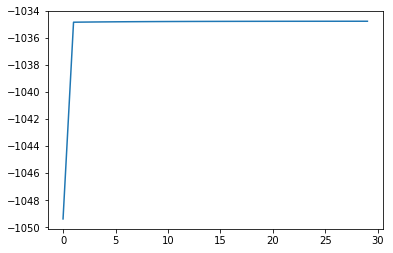

Log Likelihood with fitted params:  -1034.7557547352073
Log Likelihood true params: -1059.7229160265022
Best state sequence for:  [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [30]:
fit_coin()

## 11. Underflow Problem
Now that we have worked through implementing the training of an HMM in code, it is time to touch on some technical details. The biggest thing that we must worry about is **underflow**. Imagine that we are dealing with a very long sequence. Well, the forward algorithm says that we should just keep multiplying alpha until the end of the sequence. But, issues arise when we keep multiplying small numbers together-the number continually gets smaller and smaller. For instance, if we try and perform:

```
0.1**500 = 0
```

We see that the result is 0. The largest number that we can raise 0.1 to the power of, seems to be 323:

In [21]:
0.1**323

1e-323

And after that it drops off to 0:

In [22]:
0.1**324

0.0

Now, think about an audio signal. Audio signals are sampled at 44100Hz-or 44100 samples per second. Well, clearly our HMM will not be very useful if we can only represent a few seconds of data. So how do we solve this problem?

### 11.1 Viterbi Case
In the case of viterbi is a bit easier since it only involves multiplication!

$$log(AB) = log(A) + log(B)$$

We know that we can use the log probability instead of the actually probability, since the logarithm is monotonically increasing. So, in the case of Viterbi, it is solved!

### 11.2 Forward-Backward Case
Now, the forward-backward algorithm is a bit trickier to deal with, since it involves summations. This is going be be much harder, but what we will do is introduce the concept of scaling. To accomplish proper scaling, we are going to introduce a scale factor, which we can call $c(t)$. Just like $\alpha$ and $\beta$, it is going to be of lenghth $T$. With the scale factor, we can restate the 3 steps of the forward algorithm: 

#### Step 1: Initialization 
We begin by defining our initial $\alpha$ as $\alpha^\prime$:

$$\alpha^\prime(1, i) = \pi_i B\big(j, x(1)\big) = \alpha(1, i)$$

We then use the prime variable to define the _scale_:

$$c(t) = \sum_{i=1}^M \alpha^\prime(t, i)$$

Finally, we define $\hat{\alpha}$ to be:

$$\hat{\alpha}(t,i) = \frac{\alpha^\prime(t,i)}{c(t)}$$

$$\hat{\alpha}(1,i) = \frac{\pi_i B\big(j, x(1)\big)}{c(1)}$$

#### Step 2: Induction
We can then define our induction step as the next prime variable, in terms of the old $\hat{\alpha}$:

$$\alpha^\prime(t,i) = \sum_{i=1}^M \hat{\alpha}(t-1, i)A(i,j)B\big(j, x(t)\big)$$

This is the same expression that we had had before, except now on the left we have $\hat{\alpha}$, and on the right $\alpha^\prime$. We then scale as we had before:

$$c(t) = \sum_{i=1}^M \alpha^\prime(t, i)$$

$$\hat{\alpha}(t,i) = \frac{\alpha^\prime(t,i)}{c(t)}$$

#### Step 3: Termination
Finally, we can calculate the product of the entire sequence a follows:

$$p(x) = \prod_{t=1}^T c(t)$$

And this _can_ be logged, since it only involves multiplication!

### 11.2.1 Prove that scaling works (Forward)
Now, at first glance it may be slightly unclear as to _why_ taking the product of all of the $c(t)$'s will yield the probability of the sequence. Let's walk through in detail to determine why this is so. We can start from our end result: 

$$p(x) = \prod_{t=1}^T c(t)$$

This is essentially saying the following:

$$p(x_1, x_2, x_3,...x_n) = \prod_{t=1}^T c(t)$$

And, if we recall the **independence assumption** that we made earlier, we know that each observation is _only_ dependent on the _current state_, hence:

$$p(x_1) * p(x_2) * p(x_3) * p(x_n) = \prod_{t=1}^T c(t)$$

So, we should immediately be thinking that each $c(t)$ is meant to represent the probability of the corresponding $x(t)$. Now, if we go back the start of our process, the initialization, we can see that:

$$\alpha^\prime(1,i) = \alpha(1, i)$$

And, recall from our initial walkthrough of the forward algorithm, that that is equivalent to:

$$\alpha(1, i) = p\big(x(1), z(1) = i\big)$$

So, we know that: 

$$\alpha^\prime(1,i) = p\big(x(1), z(1) = i\big)$$

Now, for $t=1$, we defined $c$ as:

$$c(t=1) = \sum_i^M \alpha^\prime(1,i) = \sum_i^M p\big(x(1), z(1) = i\big)$$

And by taking the summation over $i$, we are marginalizing out $z$, leaving us with:

$$c(t=1) = p\big(x(1)\big)$$

Which is exactly what we should be looking for, based on the argument I put forward above. So, we know that the scaling term at $t=1$ is equal to the probability of observation $x$ at $t=1$. Let's quickly calculate our $\hat{\alpha}$:

$$\hat{\alpha}(1,i) = \frac{\alpha^\prime(1,i)}{c(1)}$$

Note, that since we know what $c(1)$ really represents, we can rewrite the above as:

$$\hat{\alpha}(1,i) = \frac{\alpha^\prime(1,i)}{p\big(x(1)\big)}$$

Now we are ready to move on to our induction step. By the definition we worked out earlier:

$$\alpha^\prime(2,j) = \sum_i^M \hat{\alpha}(1,i)A(i,j)B\big( j, x(2)\big)$$

And we can plug in what we had defined to be $\hat{\alpha}(1,i)$:

$$\alpha^\prime(2,j) = \sum_i^M \frac{\alpha^\prime(1,i)A(i,j)B\big( j, x(2)\big)}{c(1)}$$

Which, since we are just dividing by a constant, we can actually pull $c(1)$ out of the summation:

$$\alpha^\prime(2,j) = \frac{\sum_i^M \alpha^\prime(1,i)A(i,j)B\big( j, x(2)\big)}{c(1)}$$

And, we can then substitute in $p\big(x(1)\big)$ for $c(1)$!

$$\alpha^\prime(2,j) = \frac{\sum_i^M \alpha^\prime(1,i)A(i,j)B\big( j, x(2)\big)}{p\big(x(1)\big)}$$

And remember, that $\alpha^\prime(1,i)$ was equivalent to $\alpha(1,i)$, so we can update the above to be:

$$\alpha^\prime(2,j) = \frac{\sum_i^M \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{p\big(x(1)\big)}$$

This is the big moment! If we just look at our numerator, it is just representative of:

$$\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big) = p\big(x(1), x(2), z(2) = i\big)$$

And then if reinclude our denominator, we will then divide out $p\big(x(1)\big)$!

$$\frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{p\big(x(1)\big)} = \frac{p\big(x(1), x(2), z(2) = i\big)}{p\big(x(1)\big)}$$

From our independence assumption, we know that the right side can technically be written as two independent probabilities multiplied together(probability of $x(1)$ is not depedent on probability of $x(2)$, and probability of $x(2)$ is only dependent on the hidden state at $t=2$), meaning the $p\big(x(1)\big)$ will cancel out:

$$\frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{p\big(x(1)\big)} = \frac{p\big(x(1) \big) p\big( x(2), z(2) = i\big)}{p\big(x(1)\big)}$$

$$\frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{p\big(x(1)\big)} = p\big( x(2), z(2) = i\big)$$

And, if we want we can replug $c(1)$ on the left hand side:

$$\frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{c(1)} = p\big( x(2), z(2) = i\big)$$

Remember, this entire process was meant to solve for $\alpha^\prime(2,j)$:

$$\alpha^\prime(2,j) = \frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{c(1)} = p\big( x(2), z(2) = i\big)$$

And, based on the way we defined the scaling factor, we can solved for $c(2)$ as follows:

$$c(2) = \sum_i^M \alpha^\prime(2,j) = \sum_i^M \frac{\sum_i^M  \alpha(1,i)A(i,j)B\big( j, x(2)\big)}{c(1)} = \sum_i^M p\big( x(2), z(2) = i\big)$$

We can clearly see from the far right side of the above equation, that we will end up $z$ being marginalized out, and $c(2)$ being:

$$c(2) = p\big( x(2) \big)$$

Ahah! We have proven that by following this iterative process, our scaling term will represent the probability of observing $x$ at time $t$, and since they are independent of each other we can multiply them all together via:

$$p(x) = \prod_{t=1}^T c(t)$$

And, since this is now only multiplication, as I mentioned earlier we can now take the logarithm of the entire thing! Because this is in the form a product, we are able to calculate the log probabilities as our cost function. Even with multiple observations, we can remove the probability of the sequence from the update equations entirely. 

### 11.2.2 Scaling Backward
Now we can talk about our $\beta$ update; for this we do not have to calculate a new scale factor, we can just use the same one as before. So, again we have our steps:

#### Step 1: Initialization 
We have the same initialization as before:

$$\hat{\beta}(T, i) = 1$$

#### Step 2: Induction Step
The induction step is defined as follows:

$$\hat{\beta}(t,i) = \frac{\sum_{j=1}^N A(i,j)B\big(j, x(t+1)\big)\hat{\beta}(t+1, j)}{c(t+1)}$$

So, this is basically the old induction step, scaled by $c(t+1)$. 

### 11.2.3 Updates 
Now we are finally at the point where we can derive out new update equations. In order to do so, however, it is useful to first define several identities. 

#### 11.2.3.1 Identities
The identities are as follows:

#### Identity 1
$$\Big(\prod_{\tau = 1}^t c(\tau)\Big) \hat{\alpha}(t,i) = \alpha(t,i)$$

#### Identity 2
$$\hat{\alpha}(t,i)\hat{\beta}(t,i)p(x) = \alpha(t,i) \beta(t,i)$$

#### Identity 3
$$\alpha(t,i)\beta(t+1, j) = \frac{p(x)\hat{\alpha}(t,i)\hat{\beta}(t+1, j)}{c(t+1)}$$

I highly recommend before continuing that you try and workout the derivations for each of the 3 identities above. With that said, we will go through the derivations below. In order to do so we must recall the following equations and equivalences (which have all been proven throughout this post):

#### Equation 1 $\rightarrow \alpha$
<span style="color:#0000cc">
$$\alpha(t,i) = p\big(x(1), x(2),...,x(t),z(t)=i\big)$$
</span>

#### Equation 2 $\rightarrow \beta$
<span style="color:#800080">
$$\beta(t,i) = p\big(x(t+1),...,x(T) \mid z(t)=i\big)$$
</span>

#### Equation 3 $\rightarrow \hat{\alpha}$
<span style="color:#008000">
$$\hat{\alpha}(t,i) = \frac{\alpha^\prime(t,i)}{c(t)} = \frac{\alpha(t,i)}{c(t)} = \frac{p\big(x(1), x(2),...,x(t),z(t)=i\big)}{p\big(x(1)\big) * p\big(x(2)\big) * ...* p\big(x(t)\big)} = p\big(z(t)=i\big)$$
</span>

#### Equation 4 $\rightarrow \hat{\beta}$
<span style="color:#cc0000">
$$\hat{\beta}(t,i) = \frac{p\big(x(t+1),...,x(T) \mid z(t)=i\big)}{p\big(x(t+1)\big)* p\big(x(t+2)\big)*...*p\big(x(T)\big)}$$
</span>

#### Equation 5 $\rightarrow c$
<span style="color:#ff8000">
$$\prod_{t=1}^T c(t) = p(x)$$
</span>

<span style="color:#ff8000">
$$c(t) = p\big(x(t)\big)$$
</span>

Alright, now that we have the above reference the actual derivations of the identities should be rather straightforward. We can start with the first identity:

#### Identity 1 Proof
$$\Big(\prod_{\tau = 1}^t c(\tau)\Big) \hat{\alpha}(t,i) = \alpha(t,i)$$
<br>
<center>
<span style="color:#ff8000">
$p\big(x(1)\big) * p\big(x(2)\big) * ...* p\big(x(t)\big)$
</span>
<span style="color:#008000">
$* p\big(z(t)=i\big) = $
</span>
<span style="color:#0000cc">
$ p\big(x(1), x(2),...,x(t),z(t)=i\big)$
</span>
</center>


Because the probabilities inside of the joint distribution are held to the independence assumption, by definition the left and right hand side are equivalent. 

#### Identity 2 Proof
The proof surrounding the second identity is a bit more involved, but never the less straightforward. 

$$\hat{\alpha}(t,i)\hat{\beta}(t,i)p(x) = \alpha(t,i) \beta(t,i)$$

<br>

<center>
<span style="color:#008000">
$\scriptsize p\big(z(t)=i\big)$
</span>
<span style="color:#cc0000">
$\frac{p\big(x(t+1),...,x(T) \mid z(t)=i\big)}{p\big(x(t+1)\big)* p\big(x(t+2)\big)*...*p\big(x(T)\big)}$
</span>
$\scriptsize * p\big(x(1)\big) * p\big(x(2)\big) * ...* p\big(x(T)\big)$
<span style="color:#0000cc">
$\scriptsize =p\big(x(1), x(2),...,x(t),z(t)=i\big)$
</span>
<span style="color:#800080">
$\scriptsize p\big(x(t+1),...,x(T) \mid z(t)=i\big)$
</span>
</center>

On the left hand side we can cancel matching terms that occur in the denominator and numerator, leaving us with the following equivalence:

$$\scriptsize p\big(z(t)=i\big) * p\big(x(1)\big)*...*p\big(x(t)\big)* p\big(x(t+1),...,x(T) \mid z(t)=i\big) = p\big(x(1), x(2),...,x(t),z(t)=i\big) * p\big(x(t+1),...,x(T) \mid z(t)=i\big)$$

Where again, the equivalence occurs due to our independence assumption.

#### Identity 3 Proof
Finally, we can prove the third identity:

$$\alpha(t,i)\beta(t+1, j) = \frac{p(x)\hat{\alpha}(t,i)\hat{\beta}(t+1, j)}{c(t+1)}$$

<br>

<center>
<span style="color:#0000cc">
$\scriptsize p\big(x(1),...,x(t),z(t)=i\big)$
</span>
<span style="color:#800080">
$\scriptsize p\big(x(t+2),...,x(T) \mid z(t+1)=i\big)$
</span>
$\scriptsize = p\big(x(1)\big) * ...* p\big(x(T)\big)$
<span style="color:#008000">
$\scriptsize p\big(z(t)=i\big)$
</span>
<span style="color:#cc0000">
$\frac{p\big(x(t+2),...,x(T) \mid z(t+1)=i\big)}{p\big(x(t+2)\big)*...*p\big(x(T)\big)}$
</span>
<span style="color:#ff8000">
$\frac{1}{p\big(x(t+1)\big)}$
</span>
</center>

Which, after canceling terms leaves us with the following equivalence:

$$\scriptsize p\big(x(1),...,x(t),z(t)=i\big) p\big(x(t+2),...,x(T) \mid z(t+1)=i\big)= p\big(x(1)\big) *...* p\big(x(t)\big) * p\big(z(t)=i\big) * p\big(x(t+2),...,x(T) \mid z(t+1)=i\big)$$

#### 11.2.3.2 New (Scaled) Updates 
Alright, with our identities now in hand, we can define our new updates. $\pi_i$ is the same as before, but the probability term in the denominator goes away:

$$\pi_i = \frac{1}{N} \sum_{n=1}^N \hat{\alpha}_n(1,i) \hat{\beta}_n(1,i)$$

$A(i,j)$ is also very similar to before, and the probability has also gone away. The probability was just absorbed into the new terms ($\hat{\alpha}, \hat{\beta}, c$): 

$$A(i,j) = \frac{\sum_{n=1}^N \sum_{t=1}^{T(n)-1} \frac{\hat{\alpha}_n(t,i)\hat{\beta}_n(t+1, j)}{c(t+1)}A(i,j)B\big(j, x_n(t+1)\big) }{\sum_{n=1}^N  \sum_{t=1}^{T(n)-1} \hat{\alpha}_n(t,i) \hat{\beta}_n(t,i)}$$

We get a similar expression for the $B(j,k)$ variable:

$$B(j,k) = \frac{\sum_{n=1}^N \sum_{t=1}^{T(n)} \hat{\alpha}_n(t,j) \hat{\beta}_n( t,j) \; if \; x_n(t) = k, \; else \; 0}{\sum_{n=1}^N \sum_{t=1}^{T(n)} \hat{\alpha}_n(t,j) \hat{\beta}_n( t,j)}$$

Again, notice how we were able to eliminate the probability of observation, since it is implicitly included in the hatted variables. 

## 12. Discrete HMM with Scaling in Code 
This will have a good deal of similarity to the previous non scaled implementation, so we will be starting with some code from there. 

In [46]:
class HMM:
  """Define our HMM Class."""
  def __init__(self, M):
    self.M = M # Number of hidden states
    
  def fit(self, X, max_iter=30): 
    """max_iter controls how many iterations of expectation maximization we will do."""
    np.random.seed(123)
    
    # Get vocabulary size. Want to make sure input observations are numbered 0: V-1
    V = max(max(x) for x in X) + 1
    # Get Number of sequences
    N = len(X)
    
    # Initialize our matrices 
    self.pi = np.ones(self.M) / self.M         # Initialize state distribution to Uniform
    self.A = random_normalized(self.M, self.M) # Randomly initialized A matrix (M x M)  
    self.B = random_normalized(self.M, V)      # Randomly initialized B matrix (M x V)
    print('initial A: ', self.A)
    print('initial B: ', self.B)

    
    # ---- UPDATED HERE WITH SCALING - Main Expectation Maximization Loop ----
    costs = []
    for it in range(max_iter):
      if it % 10 == 0: 
        print('it: ', it)
      
      # List to hold alpha and beta. They can't be in NP array matrix, since they may be
      # different lengths. Recall, we are trying to learn the update variables FOR EACH
      # sequence
      alphas = []
      betas = []
      scales = [] # NEW scales list 
      logP = np.zeros(N) # Store log(P) instead of P
      
      # Loop through all samples
      for n in range(N):
        x = X[n]
        T = len(x)
        scale = np.zeros(T)
        alpha = np.zeros((T, self.M)) # This is going to be alpha prime
        alpha[0] = self.pi * self.B[:, x[0]]
        scale[0] = alpha[0].sum()     # Calculate our first scale
        alpha[0] /= scale[0]          # This is our alpha hat. In our equations we call
                                      # them alpha prime and alpha hat, in the code we 
                                      # can just keep them as alpha
        # Loop through for each time after the initial time
        for t in range(1, T):
          # Step 2 - induction
          alpha_t_prime = alpha[t-1].dot(self.A) * self.B[:, x[t]]
          scale[t] = alpha_t_prime.sum()
          alpha[t] = alpha_t_prime / scale[t]
        
        # Calculate log probability of a sequence
        logP[n] = np.log(scale).sum()
        alphas.append(alpha)
        scales.append(scale)
        
        # Beta step
        beta = np.zeros((T, self.M))
        beta[-1] = 1
        for t in range(T-2, -1, -1):
          # Step 2 - induction
          beta[t] = self.A.dot(self.B[:, x[t+1]] * beta[t+1]) / scale[t+1]
        betas.append(beta)
        
      cost = np.sum(logP)
      costs.append(cost)
      
      # Done with alpha and beta steps -> Now reestimate pi, A, B using new scaled updates
      self.pi = np.sum((alphas[n][0] * betas[n][0]) for n in range(N)) / N
      
      # Update directly since they don't depend on probabilities 
      den1 = np.zeros((self.M, 1))
      den2 = np.zeros((self.M, 1))
      a_num = np.zeros((self.M, self.M))
      b_num = np.zeros((self.M, V))
      for n in range(N):
        x = X[n]
        T = len(x)
        
        # Update denominator for A and B
        den1 += (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T
        den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T
        
        # Update numerator for A 
        for i in range(self.M):
          for j in range(self.M):
            for t in range(T-1):
              a_num[i,j] += alphas[n][t,i] * betas[n][t+1, j] * self.A[i,j] 
              * self.B[j, x[t+1]] / scales[n][t+1]
        # Update numerator for B
        for i in range(self.M):
          for t in range(T):
            b_num[i,x[t]] += alphas[n][t,i] * betas[n][t,i]
        
      # Divide numerator by denominator
      self.A = a_num / den1
      self.B = b_num / den2    
      
    print('A: ', self.A)
    print('B: ', self.B)
    print('pi: ', self.pi)
      
    plt.plot(costs)
    plt.show()

      
  def log_likelihood(self, x):
    """UPDATED WITH SCALED VERSION."""
    T = len(x)
    scale = np.zeros(T)                       # Define scale
    alpha = np.zeros((T, self.M))             # Define alpha
    alpha[0] = self.pi * self.B[:, x[0]]      # Define initial value of alpha prime
    scale[0] = alpha[0].sum()
    alpha[0] /= scale[0]                      # alpha hat
    # Induction steps
    for t in range(1, T):
      alpha_t_prime = alpha[t-1].dot(self.A) * self.B[:, x[t]]
      scale[t] = alpha_t_prime.sum()
      alpha[t] = alpha_t_prime / scale[t]
    return np.log(scale).sum()
  
  def log_likelihood_multi(self, X):
    """REMAINS THE SAME. Returns log likelihood of every observation."""
    return np.array([self.log_likelihood(x) for x in X])
  
  def get_state_sequence(self, x):
    """REMAINS THE SAME. This is the viterbi algorithm.
    Returns the most likely state sequence given observed sequence x."""
    T = len(x)
    delta = np.zeros((T, self.M))
    psi = np.zeros((T, self.M))
    delta[0] = self.pi * self.B[:, x[0]]
    for t in range(1, T):      # loop through every other time
      for j in range(self.M):  # loop through all states
        delta[t, j] = np.max(delta[t-1]*self.A[:, j]) * self.B[j, x[t]]
        psi[t,j] =  np.argmax(delta[t-1]*self.A[:, j])
        
    # Backtrack 
    states = np.zeros(T, dtype=np.int32)
    states[T-1] = np.argmax(delta[T-1])
    for t in range(T-2, -1, -1):
      states[t] = psi[t+1, states[t+1]]
    return states      

In [47]:
def fit_coin():
  """REMAINS THE SAME. Loads data, trains HMM."""
  X = []
  for line in open('data/coin_data.txt'):
    x = [1 if e =='H' else 0 for e in line.rstrip()]
    X.append(x)

  # Define an HMM, by creating an object of type HMM. Number of hidden states is 2.
  hmm = HMM(2)
  hmm.fit(X)
  L = hmm.log_likelihood_multi(X).sum()
  print('Log Likelihood with fitted params: ', L)
  
  # Try the true values
  hmm.pi = np.array([0.5, 0.5])
  hmm.A = np.array([[0.1, 0.9], [0.8, 0.2]])
  hmm.B = np.array([[0.6, 0.4], [0.3, 0.7]])
  L = hmm.log_likelihood_multi(X).sum()
  print("Log Likelihood true params:", L)

  # And let's try the viterbi algorithm
  print("Best state sequence for: ", X[0])
  print(hmm.get_state_sequence(X[0]))

initial A:  [[0.7087962  0.2912038 ]
 [0.29152056 0.70847944]]
initial B:  [[0.62969057 0.37030943]
 [0.58883752 0.41116248]]
it:  0
it:  10
it:  20
A:  [[0.70386662 0.29613338]
 [0.28712763 0.71287237]]
B:  [[0.54419694 0.45580306]
 [0.53723247 0.46276753]]
pi:  [0.50695647 0.49304353]


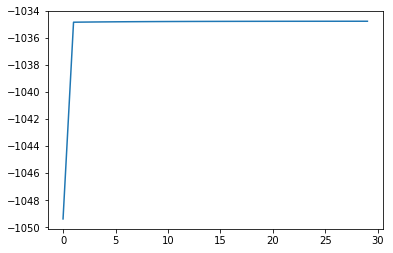

Log Likelihood with fitted params:  -1034.755754735207
Log Likelihood true params: -1059.7229160265022
Best state sequence for:  [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [48]:
fit_coin()

Finally, we can scale the Viterbi algorithm. As was discussed in the theory section earlier, this is very simple since we only need to talk the log of the sequence, since it only involves mutliplication. 

In [49]:
def get_state_sequence(self, x):
  """UPDATED WITH SCALING. 
  This is the viterbi algorithm. Returns the most likely 
  state sequence given observed sequence x."""
  T = len(x)
  delta = np.zeros((T, self.M))
  psi = np.zeros((T, self.M))
  delta[0] = np.log(self.pi) + np.log(self.B[:, x[0]])
  
  # Loop through the rest of the times and states
  for t in range(1, T):
    for j in range(self.M):
      delta[t, j] = np.max(delta[t-1] + np.log(self.A[:, j])) + np.log(self.B[j, x[t]])
      psi[t,j] = np.argmax(delta[t-1] + np.log(self.A[:, j]))
      
  # Backtrack
  states = np.zeros(T, dtype=np.int32)
  states[T-1] = np.argmax(delta[T-1])
  for t in range(T-2, -1, -1):
      states[t] = psi[t+1, states[t+1]]
  return states

initial A:  [[0.7087962  0.2912038 ]
 [0.29152056 0.70847944]]
initial B:  [[0.62969057 0.37030943]
 [0.58883752 0.41116248]]
it:  0
it:  10
it:  20
A:  [[0.70386662 0.29613338]
 [0.28712763 0.71287237]]
B:  [[0.54419694 0.45580306]
 [0.53723247 0.46276753]]
pi:  [0.50695647 0.49304353]


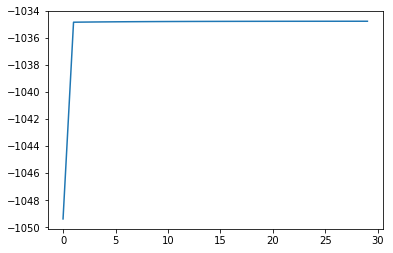

Log Likelihood with fitted params:  -1034.755754735207
Log Likelihood true params: -1059.7229160265022
Best state sequence for:  [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [50]:
fit_coin()

And we end up with the same state sequence as we did before. 